# Image Classification Using Cifar-10 Dataset:
### A Comparison of Manhattan (L1) and Euclidean (L2) Distances with 5-fold Cross-Validation

---



## Setting Up

In [1]:
!git clone https://github.com/YoongiKim/CIFAR-10-images

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 28.52 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


In [2]:
import cv2
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import os,glob
from os import listdir,makedirs
from os.path import isfile,join
from tqdm import tqdm
import random
from sklearn.model_selection import KFold
import statistics as st

In [3]:
Train_Dir = '/content/CIFAR-10-images/test'
catagories = os.listdir(Train_Dir)

## Dataset & Preprocesing:

In [4]:
#for setting up training images
train_img = []
for c in catagories:
  path = os.path.join(Train_Dir, c)
  print(c, end=" - ")
  for img in tqdm(os.listdir(path)):
    img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
    img_arr_resize= cv2.resize(img_arr, (32,32))
    train_img.append([img_arr_resize, c])

truck - 

100%|██████████| 1000/1000 [00:00<00:00, 15266.78it/s]


deer - 

100%|██████████| 1000/1000 [00:00<00:00, 24635.71it/s]


ship - 

100%|██████████| 1000/1000 [00:00<00:00, 25520.09it/s]


cat - 

100%|██████████| 1000/1000 [00:00<00:00, 24883.45it/s]


dog - 

100%|██████████| 1000/1000 [00:00<00:00, 27058.28it/s]


airplane - 

100%|██████████| 1000/1000 [00:00<00:00, 23113.95it/s]


frog - 

100%|██████████| 1000/1000 [00:00<00:00, 25441.77it/s]


bird - 

100%|██████████| 1000/1000 [00:00<00:00, 26582.23it/s]


horse - 

100%|██████████| 1000/1000 [00:00<00:00, 24013.28it/s]


automobile - 

100%|██████████| 1000/1000 [00:00<00:00, 24829.24it/s]


## Model Building and Evaluation:

In [5]:
random.shuffle(train_img)

In [6]:
KFactor = [0.25, 0.5, 1, 2, 4]
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for i,(train_index, test_index) in enumerate(kf.split(train_img)):
    k_values = np.multiply(np.sqrt(train_index.size),KFactor)
    # k_values = np.arange(1,np.sqrt(train_index.size)*10,40)
    k_values = [int(x) for x in k_values]
    break

In [7]:
accuracy = np.zeros((2,len(k_values),kf.n_splits), dtype=int)

In [8]:
top_five = [[[],0],[[],0],[[],0],[[],0],[[],0]] #image, index, percentage of labels that matched
def top5pred(comp, train_img, k):
    counter = comp.count(train_img[1])*100/k
    if counter > top_five[0][1]:
        top_five[0] = [train_img,counter]
        top_five.sort(key=lambda x: x[1])

In [9]:
for i,(train_index, test_index) in enumerate(kf.split(train_img)):
    print('Fold ', i+1, end=" - ")
    for x in tqdm(test_index):
        r = []
        testData = train_img[x][0]
        l1 = []
        l2 = []
        for y in train_index:
            trainData = train_img[y][0]
            d = np.sum(abs(testData-trainData))
            l1.append(d)
            d = np.sqrt(np.sum((testData-trainData)**2))
            l2.append(d)
        l1_i = np.argsort(l1)
        l2_i = np.argsort(l2)
        for k in k_values:
            comp = []
            for j in l1_i[:k]:
                comp.append(train_img[j][1])
            if st.mode(comp) == train_img[x][1]:
                accuracy[0][k_values.index(k)][i] += 1
                top5pred(comp,train_img[x],k)
            comp = []
            for j in l2_i[:k]:
                comp.append(train_img[j][1])
            if st.mode(comp) == train_img[x][1]:
                accuracy[1][k_values.index(k)][i] += 1
                top5pred(comp,train_img[x],k)

Fold  1 - 

100%|██████████| 2000/2000 [04:54<00:00,  6.78it/s]


Fold  2 - 

100%|██████████| 2000/2000 [04:48<00:00,  6.94it/s]


Fold  3 - 

100%|██████████| 2000/2000 [04:51<00:00,  6.86it/s]


Fold  4 - 

100%|██████████| 2000/2000 [04:45<00:00,  7.01it/s]


Fold  5 - 

100%|██████████| 2000/2000 [04:38<00:00,  7.17it/s]


## Results and Analysis:

In [10]:
L1_acc = [[],[]]
L2_acc = [[],[]]
for a in accuracy[0]:
    L1_acc[0].append(a.mean()*100/2000)
    L1_acc[1].append(a.std()*100/2000)
for a in accuracy[1]:
    L2_acc[0].append(a.mean()*100/2000)
    L2_acc[1].append(a.std()*100/2000)

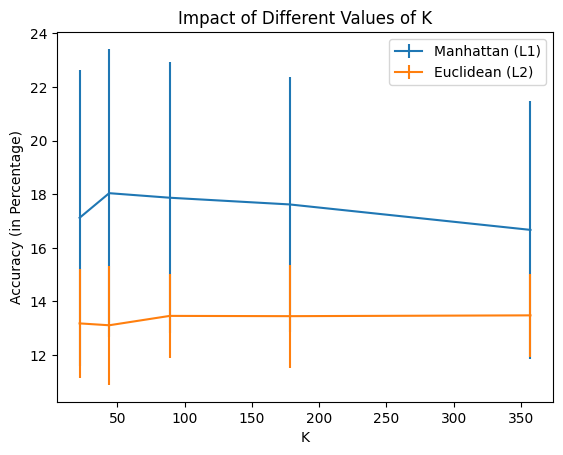

In [11]:
plt.figure()
plt.errorbar(k_values, L1_acc[0], L1_acc[1])
plt.errorbar(k_values, L2_acc[0], L2_acc[1])
plt.legend(['Manhattan (L1)','Euclidean (L2)'])
plt.xlabel('K')
plt.ylabel('Accuracy (in Percentage)')
plt.title('Impact of Different Values of K')

plt.show()

# Discussion

The L1 distance gives us a higher accuracy than L2 distance as shown on the above graph. By using 10,000 images the model was made. The images were first turned grayscale so that it takes less precessing time. For training it used 8000 random images and for Testing it used 2000 images. Each test image was compared to all the training images by using both L1 and L2. The closest k images were selected and if the majority of them are accurate the test is success.
The 10,000 images were trained-tesed for 5 times and for each the test images were uniquely different.

Manhattan (L1) and Euclidean (L2) distances, while commonly used in machine learning, have their limitations. L1 distance is sensitive to the scale of features and can be influenced by outliers. It also measures distance along axes only, which might not capture the true “distance” between instances if they lie along a diagonal[1][2]. On the other hand, L2 distance is sensitive to outliers and suffers from the curse of dimensionality in high-dimensional spaces[3][4].

To enhance classification accuracy, several improvements can be considered. Feature scaling techniques like normalization or standardization can mitigate scale sensitivity[5]. Dimensionality reduction techniques like PCA or t-SNE can alleviate the curse of dimensionality for L2 distance[3]. Weighted versions of L1 or L2 distance can account for varying importance of features[5]. Depending on the data, other distance metrics like cosine similarity or Mahalanobis distance might be more appropriate[5]. Implementing an outlier detection and removal step in your data preprocessing pipeline can also improve robustness[5].

Reference:
1. https://iq.opengenus.org/manhattan-distance/
2. https://montjoile.medium.com/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c
3. https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions/
4. https://iq.opengenus.org/euclidean-distance/
5. https://medium.com/analytics-vidhya/euclidean-and-manhattan-distance-metrics-in-machine-learning-a5942a8c9f2f



# Top Five Predictions

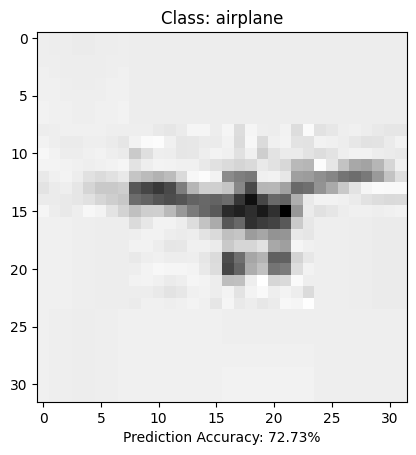

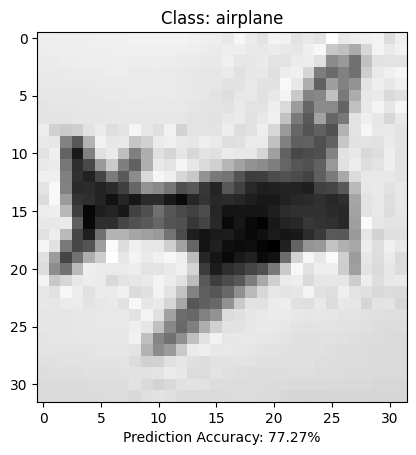

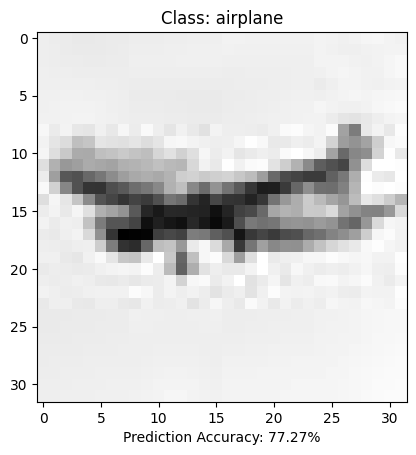

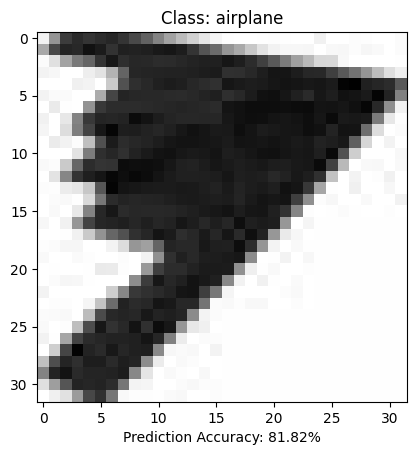

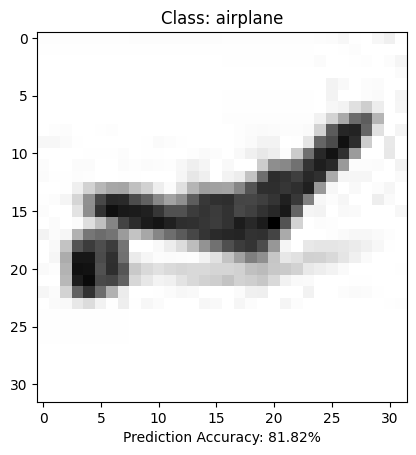

In [12]:
for x in top_five:
    plt.figure()
    plt.imshow(x[0][0], cmap='gray')
    plt.xlabel(f"Prediction Accuracy: {x[1]:.2f}%")
    plt.title(f"Class: {x[0][1]}")
    plt.show()